# Melbourne house prices


Hi! 

Welcome to the dataset description for the [Melbourne Housing Market Data](https://www.kaggle.com/anthonypino/melbourne-housing-market) which we aim to dive into during the SS2020 Machine Learning course at TU Vienna (184.702). 


Team 12: Haddar Nesrine, Maryna Gutruf

## Importing libraries

In [63]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

%matplotlib inline 
import sys
sys.path.append('../')

sns.set_style('darkgrid')

from config_ML import MELBOURNE_DATA_PATH

## Import data

In [64]:
df = pd.read_csv(MELBOURNE_DATA_PATH)

## First high-level exploration and cleaning

The first thing we do is peak into the data, and understand what kind of data we have, how large it is, and so on.

In [65]:
df.shape

(34857, 21)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

We can immediately see that there are 63023 - 48433 = 14590 `null` values in the `Price` column. We have to decide wether to keep this data or not. In this case, we'll keep it so that these houses that are sold are still going to be helpful to check the numbers of houses sold in a certain period.
We can also see that Type has no missing values (in case this is our label it is a good point)
Before omitting any missing values, we would like to do some analysis to check if maybe we can interpolate / fill them with appropriate values in order not to lose information

In [67]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Fixing some column type

Before starting to perform some analysis, let's change the type of some column to ease our job:

* We'll change `Date` to a `datetime` column and set it as index of the dataframe

In [68]:
#trasforming the Date column as datetime
df.Date = pd.to_datetime(df.Date)

#Setting the Date column as index
df.set_index('Date', inplace=True)

In [69]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-03-09,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
2016-03-12,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2016-04-02,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2016-04-02,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
2017-04-03,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Extracting first basic information

If our goal is to predict the class of a property type depending on its location, squared meters, price... We can start by analysing: 

* **property features**: Like number of rooms, bathroom, parking...
* **geography**: where the properties are
* **price**: is there a correlation between prices and property type ?


## Property features analysis 

In [70]:
df.Type.unique()

array(['h', 'u', 't'], dtype=object)

Type:

* h - house,cottage,villa, semi,terrace;
* u - unit, duplex;
* t - townhouse

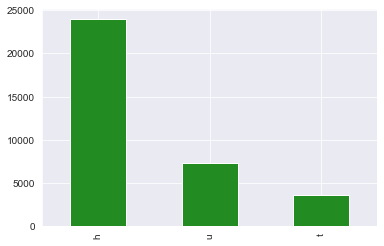

In [71]:
df.Type.value_counts().plot(kind='bar', color='forestgreen')

[]

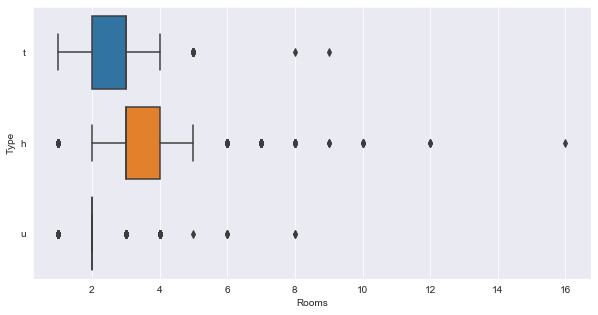

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Rooms", y="Type", data=df,
            order=df.groupby('Type').Rooms.median().sort_values(
                ascending=False).index,
            ax=ax)

plt.plot()

[]

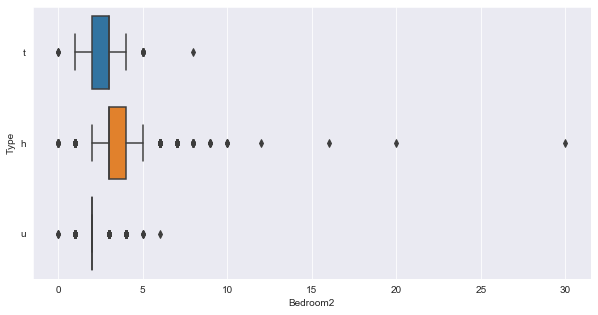

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Bedroom2", y="Type", data=df,
            order=df.groupby('Type').Bedroom2.median().sort_values(
                ascending=False).index,
            ax=ax)

plt.plot()

[]

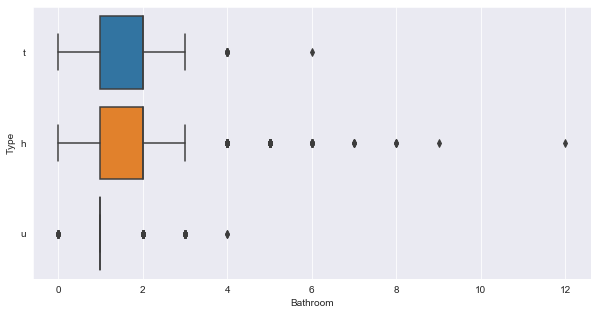

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Bathroom", y="Type", data=df,
            order=df.groupby('Type').Bathroom.median().sort_values(
                ascending=False).index,
            ax=ax)

plt.plot()

[]

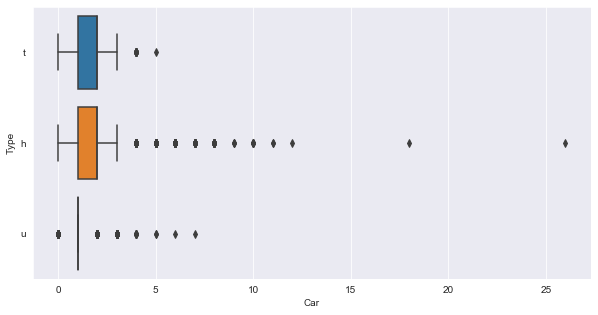

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Car", y="Type", data=df,
            order=df.groupby('Type').Car.median().sort_values(
                ascending=False).index,
            ax=ax)

plt.plot()

## Geographical analysis

The first, most basic thing to do is simply get some numbers on how many houses are sold in each Council and region:

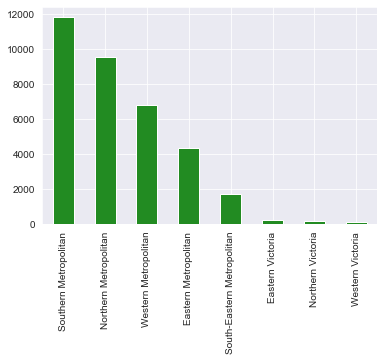

In [76]:
df.Regionname.value_counts().plot(kind='bar', color='forestgreen')

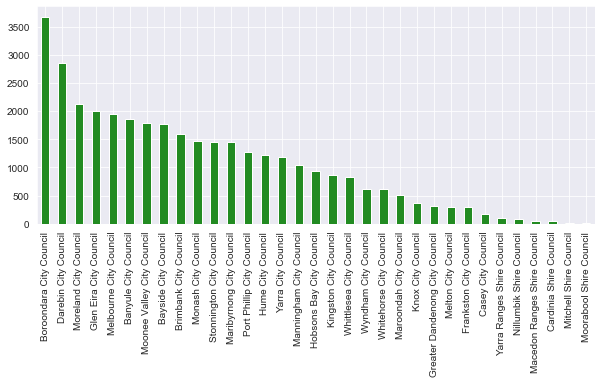

In [77]:
fig, ax = plt.subplots(figsize=(10,4))

df.CouncilArea.value_counts().plot(kind='bar', color='forestgreen', ax=ax)

In [78]:
df.groupby('Type').Regionname.value_counts()

Type  Regionname                
h     Southern Metropolitan         6968
      Northern Metropolitan         6489
      Western Metropolitan          5199
      Eastern Metropolitan          3438
      South-Eastern Metropolitan    1356
      Eastern Victoria               216
      Northern Victoria              199
      Western Victoria               113
t     Southern Metropolitan         1332
      Northern Metropolitan         1035
      Western Metropolitan           654
      Eastern Metropolitan           391
      South-Eastern Metropolitan     162
      Eastern Victoria                 5
      Northern Victoria                1
u     Southern Metropolitan         3536
      Northern Metropolitan         2033
      Western Metropolitan           946
      Eastern Metropolitan           548
      South-Eastern Metropolitan     221
      Eastern Victoria                 7
      Northern Victoria                3
      Western Victoria                 2
Name: Regionname, dtype:

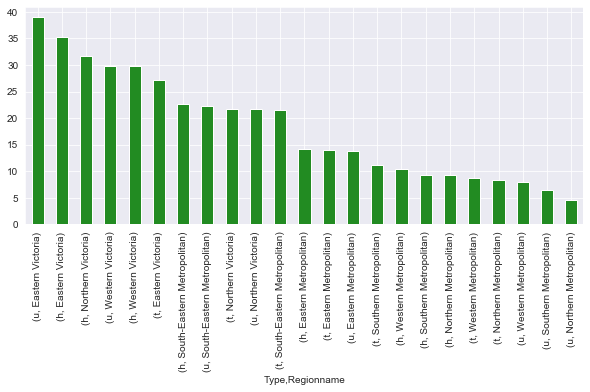

In [79]:
fig, ax = plt.subplots(figsize=(10,4))
df.groupby(['Type', 'Regionname']).Distance.median().sort_values(ascending=False) \
    .plot(kind='bar', color='forestgreen')

In [80]:
df.groupby('Type').Distance.median().sort_values(ascending=False)

Type
h    11.2
t    10.6
u     7.2
Name: Distance, dtype: float64

[]

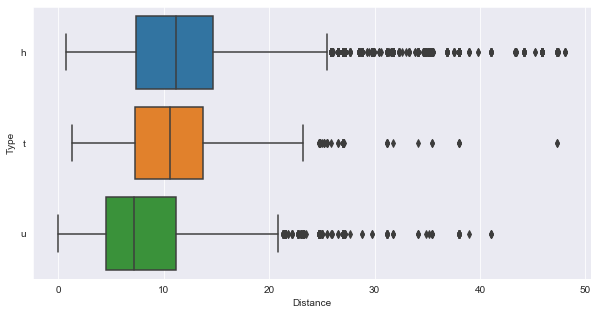

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Distance", y="Type", data=df,
            order=df.groupby('Type').Distance.median().sort_values(
                ascending=False).index,
            ax=ax)

plt.plot()

In [82]:
df.groupby('Type').Landsize.median().sort_values(ascending=False)

Type
h    579.0
t    208.0
u      0.0
Name: Landsize, dtype: float64

## Exploring the relationship between house price and Type


In [83]:
df.groupby('Type').Price.median().sort_values(ascending=False)

Type
h    1015000.0
t     850000.0
u     580000.0
Name: Price, dtype: float64

[]

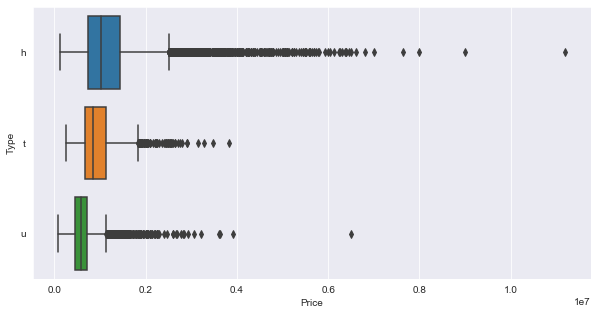

In [84]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Price", y="Type", data=df,
            order=df.groupby('Type').Price.median().sort_values(
                ascending=False).index,
            ax=ax)

plt.plot()

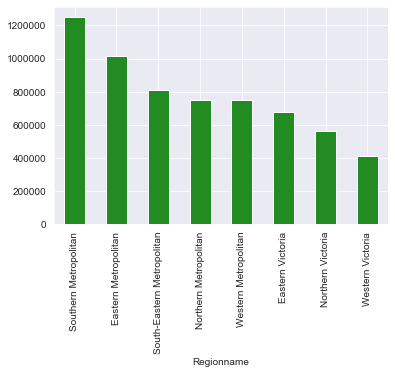

In [85]:
df.groupby('Regionname').Price.median().sort_values(ascending=False) \
    .plot(kind='bar', color='forestgreen')

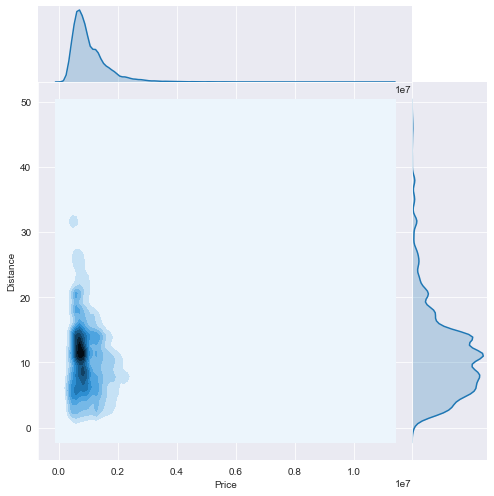

In [86]:
sns.jointplot('Price', 'Distance', data=df, kind="kde", height=7, space=0)

## Exploring time trends


In [87]:
df.index.min()

Timestamp('2016-01-28 00:00:00')

In [88]:
df.index.max()

Timestamp('2018-10-03 00:00:00')

We have almost 3 years of data, which is probably good to spot some trends.

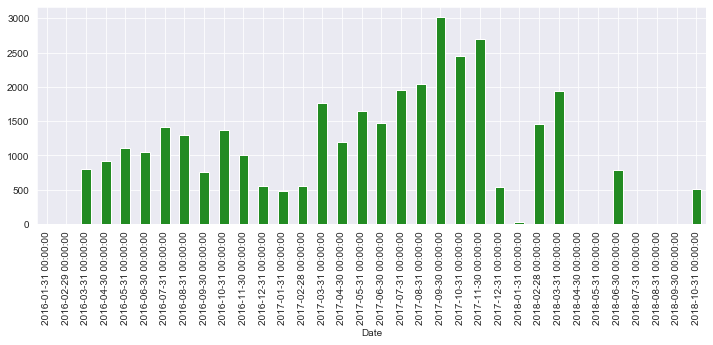

In [89]:
fig, ax = plt.subplots(figsize=(12,4))
df.resample('M').Address.count().plot(kind='bar', color='forestgreen')

If we want to have more beautiful labels on the x axis ticks without the useless times, we can do the following:

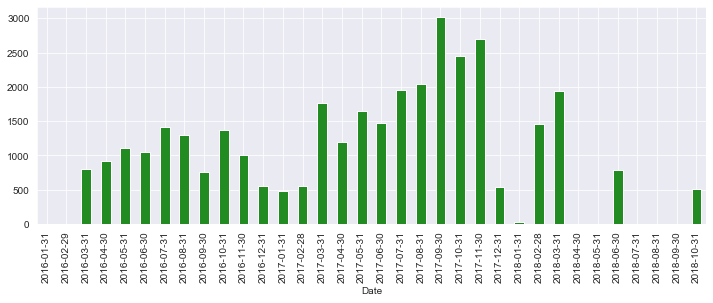

In [91]:
fig, ax = plt.subplots(figsize=(12,4))
df.resample('M').Address.count().plot(kind = 'bar', color='forestgreen')

# this is just to have clearer x axis names more beautifully
ax.set_xticklabels([x.get_text().split(' ')[0] for x in ax.get_xticklabels()])
plt.show()

Looks like the number of deals always goes down around Christmas time (seems reasonable), and 2017 saw an increase in the number of deals.